Persian HandWriting K-Means

In [1]:
# Import Libraries
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.io
import cv2


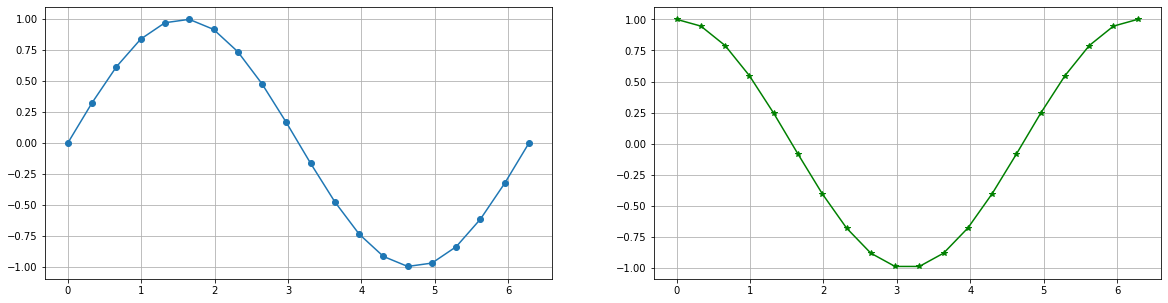

In [32]:
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
z = np.cos(x)

fig = plt.figure()

fig.set_figheight(5)
fig.set_figwidth(20)

# Adds subplot on position 1
ax = fig.add_subplot(121)
ax.grid()
# Adds subplot on position 2
ax2 = fig.add_subplot(122)
ax2.grid()
ax.plot(x, y,'-o')
ax2.plot(x, z,'-g*')
plt.show()


In [14]:
np.pi

3.141592653589793

In [47]:
x=np.linspace(0,100,30).reshape(5,6)
x[np.nonzero(x>90)]=0
x

# x[np.where(x>50)]=0
# x[  np.array([0,1,2]), np.array([0,1,2]) ]
# x

array([[ 0.        ,  3.44827586,  6.89655172, 10.34482759, 13.79310345,
        17.24137931],
       [20.68965517, 24.13793103, 27.5862069 , 31.03448276, 34.48275862,
        37.93103448],
       [41.37931034, 44.82758621, 48.27586207, 51.72413793, 55.17241379,
        58.62068966],
       [62.06896552, 65.51724138, 68.96551724, 72.4137931 , 75.86206897,
        79.31034483],
       [82.75862069, 86.20689655, 89.65517241,  0.        ,  0.        ,
         0.        ]])

In [17]:
import cdblib


# with open('new.cdb', 'wb') as f:
#     with cdblib.Writer(f) as writer:
#         writer.put(b'key', b'value')

with open('new.cdb', 'rb') as f:
    data = f.read()

reader = cdblib.Reader(data)

for key, value in reader.iteritems():
    print('+{},{}:{}->{}'.format(len(key), len(value), key, value))

+3,5:b'key'->b'value'


In [2]:
import struct

with open('DigitDB/Test20000.cdb', 'rb') as binary_file:

        data = binary_file.read()

        offset = 0

        # read private header

        yy = struct.unpack_from('H', data, offset)[0]
        print("yy :",yy)
        offset += 2
        
        m = struct.unpack_from('B', data, offset)[0]
        print("m :",m)
        offset += 1

        d = struct.unpack_from('B', data, offset)[0]
        print("d : ", d)
        offset += 1

        H = struct.unpack_from('B', data, offset)[0]
        offset += 1

        W = struct.unpack_from('B', data, offset)[0]
        offset += 1

        TotalRec = struct.unpack_from('I', data, offset)[0]
        print(TotalRec)
        offset += 4

        LetterCount = struct.unpack_from('128I', data, offset)
        offset += 128 * 4

        imgType = struct.unpack_from('B', data, offset)[0]  # 0: binary, 1: gray
        offset += 1

        Comments = struct.unpack_from('256c', data, offset)        
        offset += 256 * 1

        Reserved = struct.unpack_from('245c', data, offset)
        offset += 245 * 1

        if (W > 0) and (H > 0):
            normal = True
        else:
            normal = False
        
        images = []
        labels = []

        for i in range(TotalRec):

            StartByte = struct.unpack_from('B', data, offset)[0]  # must be 0xff
            offset += 1

            label = struct.unpack_from('B', data, offset)[0]
            offset += 1

            if not normal:
                W = struct.unpack_from('B', data, offset)[0]
                offset += 1

                H = struct.unpack_from('B', data, offset)[0]
                offset += 1

            ByteCount = struct.unpack_from('H', data, offset)[0]
            offset += 2

            image = np.zeros(shape=[H, W], dtype=np.uint8)

            if imgType == 0:
                # Binary
                for y in range(H):
                    bWhite = True
                    counter = 0
                    while counter < W:
                        WBcount = struct.unpack_from('B', data, offset)[0]
                        offset += 1
                        # x = 0
                        # while x < WBcount:
                        #     if bWhite:
                        #         image[y, x + counter] = 0  # Background
                        #     else:
                        #         image[y, x + counter] = 255  # ForeGround
                        #     x += 1
                        if bWhite:
                            image[y, counter:counter + WBcount] = 0  # Background
                        else:
                            image[y, counter:counter + WBcount] = 255  # ForeGround
                        bWhite = not bWhite  # black white black white ...
                        counter += WBcount
            else:
                # GrayScale mode
                data = struct.unpack_from('{}B'.format(W * H), data, offset)
                offset += W * H
                image = np.asarray(data, dtype=np.uint8).reshape([W, H]).T

            images.append(image)
            labels.append(label)
            
            
            

yy : 2005
m : 8
d :  4
20000


shape of image is :  (29, 22)
label of image is: 7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  255 255   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255 255 255   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255 255 255 255]
 [255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0 255
  255 255 255   0]
 [  0 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0 255 255
  255 255 255   0]
 [  0 255 255 255   0   0   0   0   0   0   0   0   0   0   0 255 255 255
  255 255   0   0]
 [  0 255 255 255   0   0   0   0   0   0   0   0   0   0   0 255 255 255
  255   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0   0   0   0   0 255 255 255 255
  255   0   0   0]
 [  0 255 255 255   0   0   0   0   0   0   0   0   0 255 255 255 255 255
    0   0   0   0]
 [  0 255 255 255 2

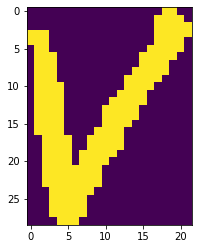

In [3]:
im=15000

l=labels[im]
z=images[im]
print("shape of image is : " ,z.shape)
print("label of image is:",l)
print(z)
plt.imshow(z)

In [12]:

def __convert_to_one_hot(vector, num_classes):
    result = np.zeros(shape=[len(vector), num_classes])
    result[np.arange(len(vector)), vector] = 1
    return result


def __resize_image(src_image, dst_image_height, dst_image_width):
    src_image_height = src_image.shape[0]
    src_image_width = src_image.shape[1]

    if src_image_height > dst_image_height or src_image_width > dst_image_width:
        height_scale = dst_image_height / src_image_height
        width_scale = dst_image_width / src_image_width
        scale = min(height_scale, width_scale)
        img = cv2.resize(src=src_image, dsize=(0, 0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
    else:
        img = src_image

    img_height = img.shape[0]
    img_width = img.shape[1]

    dst_image = np.zeros(shape=[dst_image_height, dst_image_width], dtype=np.uint8)

    y_offset = (dst_image_height - img_height) // 2
    x_offset = (dst_image_width - img_width) // 2

    dst_image[y_offset:y_offset+img_height, x_offset:x_offset+img_width] = img

    return dst_image



images_height=32
images_width=32
one_hot=False
reshape=True
    
assert len(images) == len(labels)

X = np.zeros(shape=[len(images), images_height, images_width], dtype=np.float32)
Y = np.zeros(shape=[len(labels)], dtype=np.int)

for i in range(len(images)):
    image = images[i]
    # Image resizing.
    image = __resize_image(src_image=image, dst_image_height=images_height, dst_image_width=images_width)
    # Image normalization.
    image = image / 255
    # Image binarization.
    image = np.where(image >= 0.5, 1, 0)
    # Image.
    X[i] = image
    # Label.
    Y[i] = labels[i]

if one_hot:
    Y = __convert_to_one_hot(Y, 10).astype(dtype=np.float32)
else:
    Y = Y.astype(dtype=np.float32)

# if reshape:
#     X = X.reshape(-1, images_height * images_width)
# else:
#     X = X.reshape(-1, images_height, images_width, 1)



(32, 32)


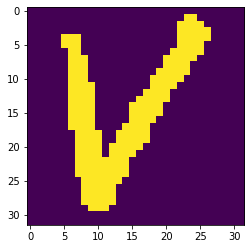

In [17]:
xx=X[15000]
print(xx.shape)
plt.imshow(xx)